<a href="https://colab.research.google.com/github/HoangThangCDT/Homework/blob/main/Predict_food_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [12]:
im_shape = (150,150)

TRAINING_DIR = '../content/drive/MyDrive/food/train'
TEST_DIR = '..//content/drive/MyDrive/food/test'

seed = 10

BATCH_SIZE = 16

In [13]:
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [14]:
# Generator data train
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator data validation
validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator data test
test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 350 images belonging to 10 classes.
Found 84 images belonging to 10 classes.
Found 124 images belonging to 10 classes.
Classes: ['banh mi', 'banh trung', 'banh xeo', 'ca kho', 'com tam', 'ga', 'goi', 'pho bo', 'thit kho', 'xoi']


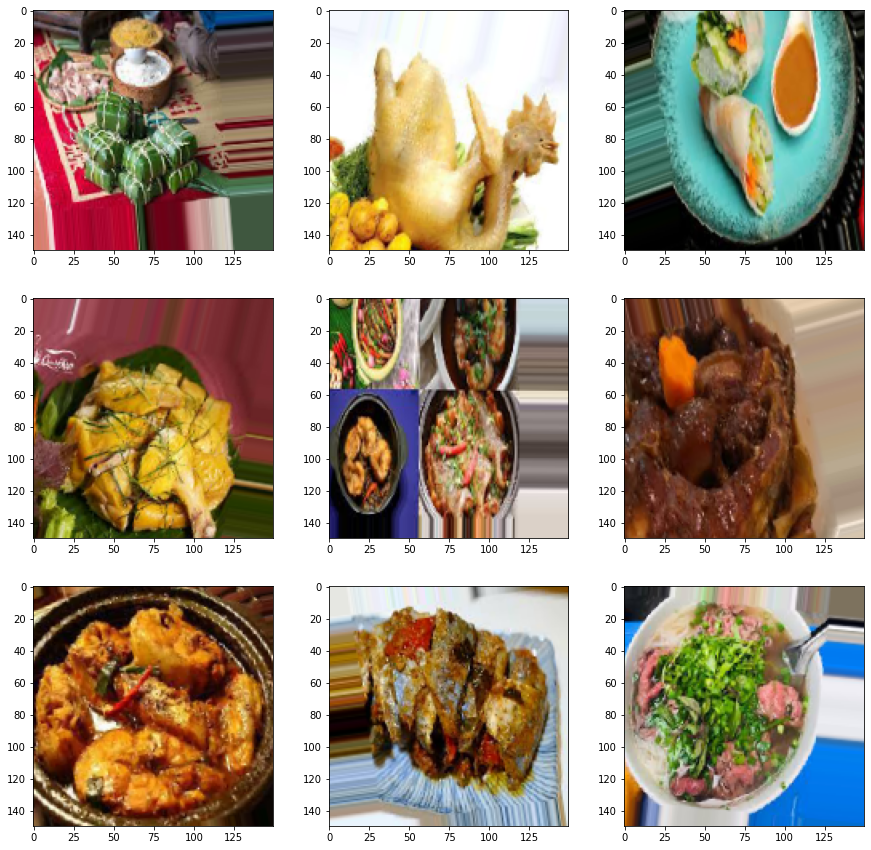

In [15]:
plt.figure(figsize=(15,15))
for i in range(9):
    
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# Compile model

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 331776)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               42467456  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                      

In [17]:
#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=50,
        
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/50
21/21 [==============================] - 19s 858ms/step - loss: 7.1123 - accuracy: 0.1138 - val_loss: 2.2618 - val_accuracy: 0.1250
Epoch 2/50
21/21 [==============================] - 18s 842ms/step - loss: 2.2482 - accuracy: 0.1018 - val_loss: 2.0789 - val_accuracy: 0.1125
Epoch 3/50
21/21 [==============================] - 18s 847ms/step - loss: 2.1273 - accuracy: 0.2006 - val_loss: 1.9524 - val_accuracy: 0.2000
Epoch 4/50
21/21 [==============================] - 18s 845ms/step - loss: 2.0353 - accuracy: 0.2305 - val_loss: 1.7388 - val_accuracy: 0.3375
Epoch 5/50
21/21 [==============================] - 19s 887ms/step - loss: 1.9742 - accuracy: 0.2335 - val_loss: 1.8505 - val_accuracy: 0.3625
Epoch 6/50
21/21 [==============================] - 18s 856ms/step - loss: 1.9456 - accuracy: 0.2994 - val_loss: 1.7125 - val_accuracy: 0.3250
Epoch 7/50
21/21 [==============================] - 18s 856ms/step - loss: 1.8939 - accuracy: 0.3024 - val_loss: 1.7693 - val_accuracy: 0.3000

In [18]:
from keras.models import load_model
import numpy as np
from keras.preprocessing.image import load_img,img_to_array

In [19]:
model.save('final1.h')

INFO:tensorflow:Assets written to: final1.h/assets


In [21]:
model6 = tf.keras.models.load_model('final1.h')

'banh xeo'

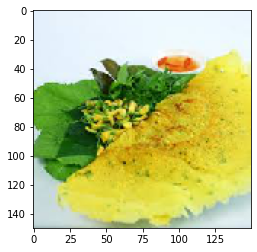

In [28]:
img=load_img('/content/pred5.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model6.predict(img),axis=1)[0]
classes[np.argmax(model6.predict(img),axis=1)[0]]

'thit kho'

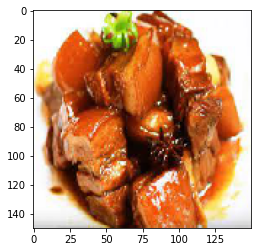

In [29]:
img=load_img('/content/pred1.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model6.predict(img),axis=1)[0]
classes[np.argmax(model6.predict(img),axis=1)[0]]

'ca kho'

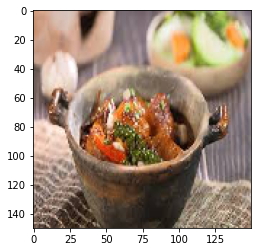

In [30]:
img=load_img('/content/pred2.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model6.predict(img),axis=1)[0]
classes[np.argmax(model6.predict(img),axis=1)[0]]

'pho bo'

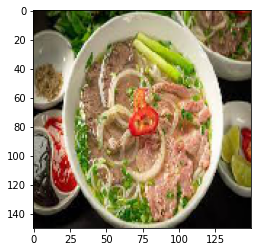

In [31]:
img=load_img('/content/pred3.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model6.predict(img),axis=1)[0]
classes[np.argmax(model6.predict(img),axis=1)[0]]

'com tam'

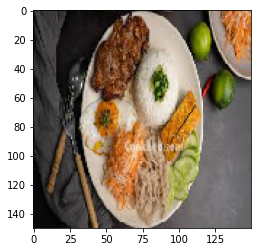

In [32]:
img=load_img('/content/pred4.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model6.predict(img),axis=1)[0]
classes[np.argmax(model6.predict(img),axis=1)[0]]

'banh trung'

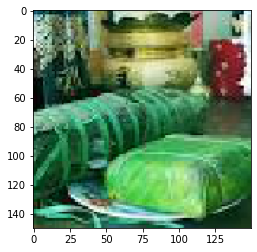

In [33]:
img=load_img('/content/pred6.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model6.predict(img),axis=1)[0]
classes[np.argmax(model6.predict(img),axis=1)[0]]